In [1]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


/Users/xrz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# 转换为DMatrix数据格式，XGBoost的优化数据结构
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 设置XGBoost的参数
params = {
    'max_depth': 3,
    'eta': 0.3,
    'objective': 'multi:softmax',  # 注意：对于多分类问题，我们使用multi:softmax
    'num_class': 3  # 类别数，与鸢尾花的类别数一致
}

# 训练模型
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# 预测测试集
preds = bst.predict(dtest)


In [4]:
# 评估模型
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 混淆矩阵
print(confusion_matrix(y_test, preds))

# 分类报告
print(classification_report(y_test, preds))


Accuracy: 100.00%
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



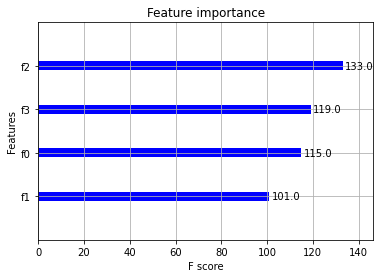

In [6]:
xgb.plot_importance(bst,color = 'blue')
plt.show()


In [7]:
# 获取特征重要性
importance = bst.get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': [importance.get(f"f{i}", 0) for i in range(len(iris.feature_names))]
}).sort_values(by='Importance', ascending=False)

print(importance_df)


             Feature  Importance
2  petal length (cm)       133.0
3   petal width (cm)       119.0
0  sepal length (cm)       115.0
1   sepal width (cm)       101.0


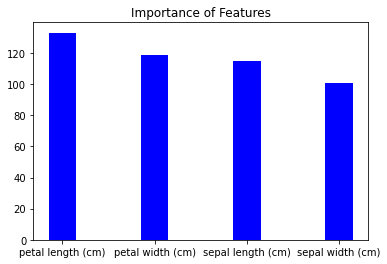

In [19]:
plt.bar(np.arange(len(importance_df['Importance'])),list(importance_df['Importance']),width=0.3,color = 'blue')
plt.xticks(np.arange(len(importance_df['Importance'])),list(importance_df['Feature']))
plt.title("Importance of Features")
plt.savefig('Importance.png',transparent = True)

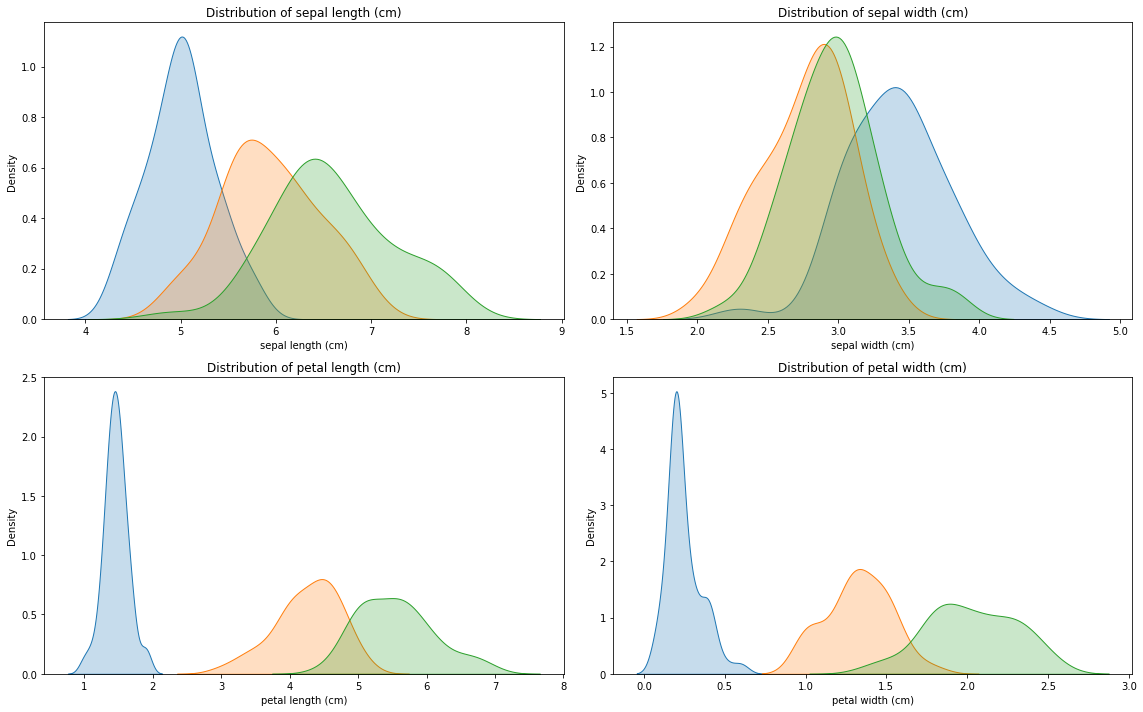

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# 更新代码以适应可能的限制或错误
plt.figure(figsize=(16, 10))
# 加载数据
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 对每个特征和种类绘制分布图
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    for species in np.unique(df_iris['species']):
        # 选择当前种类和特征的数据
        subset = df_iris[df_iris['species'] == species]
        sns.kdeplot(subset[feature], label=species, shade=True)
    #plt.legend()
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.savefig('Iris-ori_nolegend.png',transparent = True)
plt.show()


In [21]:
# 假设X_test, y_test是测试数据集及其真实标签，preds是模型的预测标签
# 转换为DataFrame以便于操作
df_test = pd.DataFrame(X_test, columns=iris.feature_names)
df_test['true_species'] = pd.Categorical.from_codes(y_test, iris.target_names)
# 确保preds是整数类型的数组
preds_int = preds.astype(int)

# 使用整数数组创建预测类别的Categorical类型
df_test['predicted_species'] = pd.Categorical.from_codes(preds_int, iris.target_names)



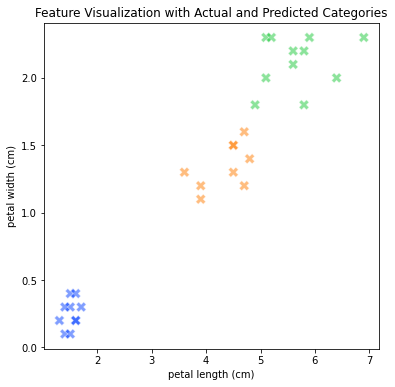

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 选择要可视化的两个特征
features_to_plot = ['petal length (cm)', 'petal width (cm)']

# 创建一个新列来标识预测是否正确
df_test['correct_prediction'] = df_test['true_species'] == df_test['predicted_species']

# 绘制散点图
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_test, x=features_to_plot[0], y=features_to_plot[1], 
                hue='true_species', s = 100,style='correct_prediction', palette='bright',
                markers={True: 'X', False: '.'}, alpha=0.5,legend=False)

plt.title('Feature Visualization with Actual and Predicted Categories')
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("Predicted.png",transparent  = True)
plt.show()
